# ch 5 훈련 노하우를 배웁니다.
## 05-1. 검정세트를 나누고 전처리 과정을 배웁니다.

- 유방암 데이터 셋을 '훈련세트'와 '테스트 세트'로 나누어서 준비했다.
 훈련 세트는 fit()메서드에 전달되어 모델을 훈련하는데 사용하였고 테스트 세트는 score()메서드에 전달해 모델의 성능을 평가했다. 
 여기서는 테스트 세트의 사용방법에 대해 조금 더 깊이 알아보려고 한다. 



 __테스트 세트로 모델을 튜닝한다.__(사실 테스트세트로 모델을 튜닝하는게 왜 잘못되는지 말해주려고 돌려보는 것 같음)  
 
  4장 마지막에서는 사이킷런의 SGDclassifier 클래스를 이용해서 로지스틱 회귀 문제에 경사하강법을 적용했고, 이때 loss function을 log로 지정해서 로지스틱 손실함수를 손실함수로 지정했다.

__로지스틱 회귀로 모델 훈련하고 평가하기__  

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all, x_test, y_train_all, y_test= train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

sgd=SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

### __서포트 벡터 머신으로 모델 훈련하고 평가하기__
- SGDClassifier 클래스의 loss 매개변수를 log에서 hinge로 바꾸면 선형 서포트 벡터 머신(Support Vector Machine)문제를 푸는 모델이 만들어진다.  
여기에서 SVM이란 훈련 데이터의 클래스를 구분하는 경계선을 찾는 작업 정도로 이해하면 된다. 


![](https://web.archive.org/web/20150422065824im_/http://scikit-learn.org/stable/_images/plot_sgd_separating_hyperplane_0011.png)

In [6]:
sgd=SGDClassifier(loss='hinge', random_state=42) # loss function을 hinge로 쓰는 것이 log로 쓰는 것보다(로지스틱 회귀보다 서포트벡터머신이 테스트 데이터를 더 잘 분류해낸다.)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

__하이퍼파라미터(hyperparameter)__: 모델 알고리즘에서 사람이 직접 입력시켜줘야하는 값(모델의 가중치를 파라미터라고 함, 파라미터와 하이퍼파라미터 를 혼동하지 말자) 여러번 시도해서 가장 높은 점수가 나오는 하이퍼파라미터를 선택하는데 이 과정을 '모델을 튜닝한다'고 한다.

ex) 손실함수 선택(log, hinge 등등), epochs, batch size, learning rate, hidden layer를 몇층을 할지 hidden layer의 노드의 개수를 어떻게 할지 등 모두 하이퍼파라미터로 튜닝해야하는 값이다.



하이퍼파라미터를 튜닝할때 우린 주의해야하는 점이 있는데 테스트세트로 튜닝을 하게 되면 __테스트 셋에 간접적으로 훈련하는 효과를 낳게 되어서 일반적으로 좋은 성능을 보이는 모델__이 아닌 테스트셋에 __오버피팅__되는 모델이 된다. 그래서 일반화 성능추정이 어려워진다. 즉, 실전에서 좋은 성능을 내지 못할 확률이 높습니다.

__why?__ 테스트 세트로 튜닝한 모델은 테스트 세트에서만 좋은 성능을 보이는 하이퍼파라미터의 조합으로 테스트 될 위험이 있다.  
이런 현상을 '테스트 세트의 정보가 모델에 새어 나갔다'라고 말한다. 즉, 테스트 세트로 모델을 튜닝하면 테스트 세트의 정보가 모델에 새어 나가므로 모델의 일반화 성능(Generalization performance)이 왜곡된다. 



### 그래서!!! 검증세트(validation set)를 준비한다. 
훈련데이터 세트에서 일부 떼어낸 검증 셋트 혹은 개발세트이라고 하는 것을  만든다.
훈련 데이터로 모델을 튜닝하여서 검증세트에서 테스트를 한다. 이렇게 테스트를 하여서 가장 성능이 좋은 하이퍼파라미터의 조합을 찾아내고 이렇게 찾아낸 조합으로 만들어낸 모델을 __실전에 투입하기 전에 딱 한번만 테스트세트에서 테스트__를 한다. 
![](https://blog.kakaocdn.net/dn/dVfds2/btqLkhbs7T4/U97igLNa0nSfvmBPn5BnbK/img.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fk4UQW%2FbtqLjsEmxTP%2FUGalfLDhyaw5MF5GD5KjI1%2Fimg.png)
 

## 검증세트를 나눠서 훈련하고 모델 평가하는 3단계
### 1. 데이터 세트 준비하기
 위스콘신 유방암 데이터 준비하기

### 2. 검증세트 분할하기

앞에서 훈련, 검증, 테스트 세트는 6:2:2로 분할한다고 했다. 하지만 실제 분할작업은 8:2로 훈련-테스트세트 나누고, 다시 훈련데이터 세트를 8:2로 나누어서 2를 검증세트로 할당한다.  (데이터가 100개라면 64:20:16)

In [17]:
x=cancer.data
y=cancer.target

x_train_all, x_test, y_train_all,y_test=train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val=train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

print("유방암데이터 전체 데이터:",x.shape[0], "/ 훈련데이터 전체 개수:569*0.8=",len(x_train_all),"/ 검증세트를 떼어낸 훈련세트:455*0.8=",len(x_train), "/ 검증세트 개수:455*0.2=",len(x_val))


유방암데이터 전체 데이터: 569 / 훈련데이터 전체 개수:569*0.8= 455 / 검증세트를 떼어낸 훈련세트:455*0.8= 364 / 검증세트 개수:455*0.2= 91


In [14]:
print(569*0.8, 455*0.8, 455*0.2)

455.20000000000005 364.0 91.0





### 3. 검증세트 사용해서 모델 평가하기 

훈련세트의 데이터 양이 줄었기 때문에 평가점수가 조금 낮아지게 된다. 위스콘신 유방암데이터의 샘플 개수가 적어서 검증세트 비율을 조금만 조절해도 성능평가 점수가 크게 변한다. 데이터 양이 너무 적으면 검증세트를 나누지 않고 교차검증(cross validation)을 하기도 한다.  
(정형 데이터로 예측모델 만들때는 주로 k-fold cross validation을 썼음. 훈련데이터에서 검증세트를 떼어내지 않아도 되어서 훈련을 충분히 시킬 수 있다는 장점이 있지만 검증하는데 시간이 오래 걸린다는 단점이 있다. 보통 10 fold cross validation을 구하고 이에 대한 평균을 구해서 예측 성능을 측정함. 아래 그림은 5-fold cross validation)
![k-fold cross validation](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcaM9Yt%2FbtqVOsIyV9o%2FCnu2KjGWZzKfK2Mm6lf7Mk%2Fimg.png)

__일반적으로 10만개 데이터가 있으면 8:1:1로 분할하고 100만개 이상의 데이터는 98:1:1 정도로 비율로 샘플을 나눈다.__

In [19]:
sgd=SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val) # 검증세트를 나누기 전에는 0.8333333

0.6923076923076923

▶ key point
- 테스트 세트로 모델을 튜닝하면 테스트 세트의 정보가 모델에 새어나간다.
- 검증세트로 모델을 튜닝해야한다.
- 훈련세트, 검증세트, 테스트 세트는 일반적으로 6:2:2의 비율로 나눈다.

## __데이터 전처리와 특성의 스케일을 알아보자.__

사이킷런에서 제공하는 데이터는 실습을 위한 것이기 때문에 잘 가공되어있지만 실전에서 수집된 데이터는 그렇지 않다.  
누락된 데이터가 있기도 하고 데이터의 형태가 균일하지 않을 수도 있고 데이터에 잘못된 값이 들어가거나 이상치가 존재하기도 한다. 이런 데이터들을 적절하게 가공하는 것을 '데이터 전처리(data preprocessing)'과정이 필요한다.

__특성의 스케일은 알고리즘에 영향을 준다.__



In [27]:
df=pd.DataFrame(cancer.data[:,[2,3]], columns=cancer.feature_names[[2,3]])

In [30]:
df.describe()

,mean perimeter,mean area
count,569.000000,569.000000
mean,91.969033,654.889104
std,24.298981,351.914129
min,43.790000,143.500000
25%,75.170000,420.300000
50%,86.240000,551.100000
75%,104.100000,782.700000
max,188.500000,2501.000000


['mean perimeter' 'mean area']


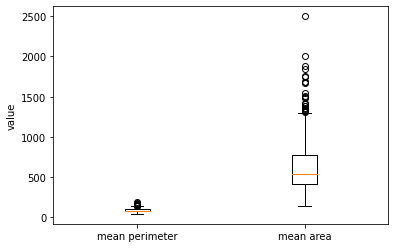

In [39]:
print(cancer.feature_names[[2,3]])

plt.boxplot(x_train_all[:, 2:4])
plt.ylabel('value')
plt.xticks([1,2],cancer.feature_names[[2,3]])

plt.show()

mean perimeter, mean area의 값의 범위는 각각 43.79 ~ 118.5, 143.5 ~ 2501.0 으로 박스플롯 그림으로만 보아도 두 변수의 스케일 차이가 크다.   
결론은 __데이터의 스케일 차이가 많이 나는 두 변수들을 스케일 변환을 하지 않고 데이터를 학습하면 가중치가 불안정하게 학습__된다. 다음은 실제로 불안정하게 학습되는 모습을 보여준다.

3장에서 만들었던 SingleLayer 클래스에 인스턴스 변수를 추가하여서  

__w_history:__ 에포크마다 가중치의 값을 저장하여 가중치의 변화를 관찰할 때 사용한다.  

__lr:__ 학습률(learning rate)이라는 개념도 도입해보자.
가중치를 얼만큼 업데이트할지를 설정하는 것으로 손실함수가 최소가 되는 전역 최솟값을 찾기 위해서 적절한 학습률을 설정 해주어야 한다.  

학습률이 너무 높으면 가중치의 변화가 커서 전역 최솟값을 지나칠 수있다.   
반면에 학습률을 적절하게 적용한 모델은 가중치가 적절한 폭으로 업데이트 되므로 천천히 전역 최솟값을 찾을 수 있다.  
주어진 문제마다 적절한 학습률은 다르지만 보통 0.001, 0.01 등 로그스케일로 학습률을 지정하여 학습을 한다.  


fit 메소드를 보면
self.w-=self.lr*w_grad 가중치를 할때 학습률을 반영해서 업데이트하는 것을 볼 수 있다. 

In [46]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = [] # validation set의 손실 저장
        self.w_history = [] # weight 가중치의 변화 저장
        self.lr = learning_rate # learning rate을 튜닝할 수 있도록 
        self.l1 = l1 # L1 규제 
        self.l2 = l2 # L2 규제

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         # 가중치 업데이트
                self.b -= self.lr * b_grad         # 절편 업데이트

                # 업데이트 된 가중치를 기록합니다. 
                # self.w.copy()를 하지 않으면 맨 처음의 1.0 이외에는 모두 최종 w값이 입력됨.(모두 같은 값이 된다.)
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) >= 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [47]:
layer1=SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

In [54]:
len(w2)

36401

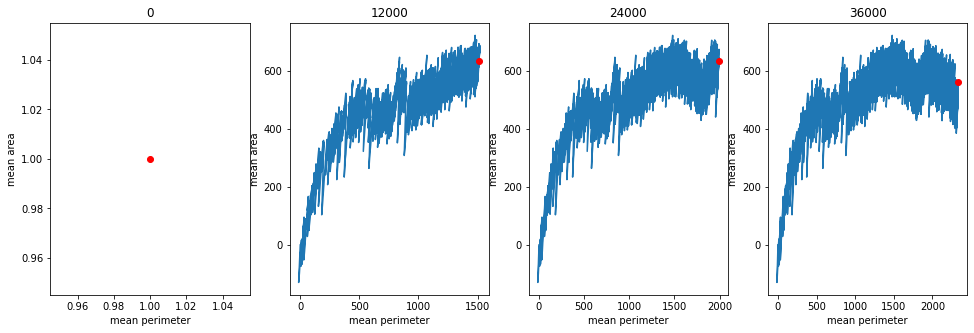

In [64]:
w2=[]
w3=[]
n=0
plt.figure(figsize=(25,5))
for i, w in enumerate(layer1.w_history):
  w2.append(w[2])
  w3.append(w[3])
  if i%12000==0:
    n+=1
    plt.subplot(1,6,n)
    plt.plot(w2,w3)
    plt.plot(w2[-1],w3[-1],'ro')
    plt.xlabel('mean perimeter')
    plt.ylabel("mean area")
    plt.title("%d"%i)
plt.show()

앞서서 mean perimeter 값의 범위는 43.79 ~ 118.5, mean area의 값의 범위는 143.5 ~ 2501.0 으로 mean area 값의 스케일이 더 크다.  
mean perimeter(w2)는 0부터 시작해서 조금씩 최적값에 가까워진다.  
이 그래프의 현상을 __'mean area(w3)에 대한 그레디언트가 크기 때문에 mean area(w3)축을 따라 가중치가 크게 요동치고 있다'__ 고 말한다.  

다음은 4장에서 보았던 로지스틱 손실함수 경사하강법의 공식이다. 
$$w_i=w_i+(y-a)x_i$$
 이 식의 오른쪽 식의 두번째 항에 $x_i$가 있다. 즉, 가중치를 업데이트를 하는데 특성(feature)이 영향을 미치게 된다.  
  만일 데이터의 스케일 차이가 많이 나게 되면 가중치를 최적화 하는 속도가  차이가 나고 위 그림과 같이 모델이 불안정하게 수렴하게 되므로 스케일이 비슷하도록 만들어주는 표준화를 해주어야한다.


### __해결법: 스케일을 조정해서 모델을 훈련한다.__

스케일을 조정하는 방법은 많지만 신경망에서 자주 사용하는 스케일 조정방법 중 하나는 표준화(standardization)입니다. 

__표준화__는 특성값에서 평균을 빼고 표준편차로 나누면 된다. 표준화를 하면 평균이 0이고 분산이 1인 특성이 만들어진다. 
$$z=\frac{x-\mu}{s}$$
$\mu$는 평균, $s$는 분산이다. 

#### 1. 넘파이로 표준화 구하기

In [71]:
df_=pd.DataFrame(x_train)
print(df_.shape)
df_.head()


(364, 30)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,14.80,17.66,95.88,674.8,0.09179,0.0889,0.04069,0.02260,0.1893,0.05886,0.2204,0.6221,1.482,19.75,0.004796,0.01171,0.01758,0.006897,0.02254,0.001971,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285
1,11.74,14.02,74.24,427.3,0.07813,0.0434,0.02245,0.02763,0.2101,0.06113,0.5619,1.2680,3.717,37.83,0.008034,0.01442,0.01514,0.018460,0.02921,0.002005,13.31,18.26,84.70,533.7,0.1036,0.0850,0.06735,0.08290,0.3101,0.06688
2,14.71,21.59,95.55,656.9,0.11370,0.1365,0.12930,0.08123,0.2027,0.06758,0.4226,1.1500,2.735,40.09,0.003659,0.02855,0.02572,0.012720,0.01817,0.004108,17.87,30.70,115.70,985.5,0.1368,0.4290,0.35870,0.18340,0.3698,0.10940
3,18.77,21.43,122.90,1092.0,0.09116,0.1402,0.10600,0.06090,0.1953,0.06083,0.6422,1.5300,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.4827,0.46340,0.20480,0.3679,0.09870
4,11.80,16.58,78.99,432.0,0.10910,0.1700,0.16590,0.07415,0.2678,0.07371,0.3197,1.4260,2.281,24.72,0.005427,0.03633,0.04649,0.018430,0.05628,0.004635,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300


In [68]:
train_mean=np.mean(x_train,axis=0)
train_std=np.std(x_train, axis=0)
x_train_scaled=(x_train-train_mean)/train_std

In [72]:
train_mean.shape

(30,)

#### 2. 모델 훈련

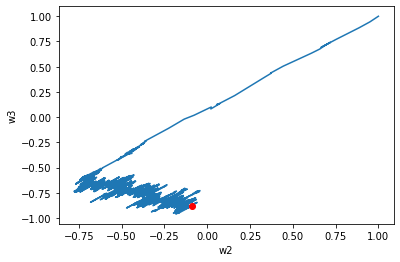

In [138]:
layer2=SingleLayer()
layer2.fit(x_train_scaled, y_train)

w2,w3=[],[]

for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2,w3)
plt.plot(w2[-1], w3[-1],'ro')
plt.xlabel('w2')
plt.ylabel('w3')
plt.show()

이전 그래프와 다르게 w2와 w3의 변화비율이 비슷하기 때문에 대각선 방향으로 가중치가 이동하였고 두 설명변수(특성, feature)의 스케일이 비슷하게 맞추었으므로 최적값에 빠르게 근접하고 있음을 알 수 있다.  
__경사하강법에서는 서로 다른 특성의 스케일을 맞추는 것이 아주 중요하다__  
이미지 데이터셋의 경우는 이미지 데이터셋은 한 픽셀의 값이 최소값0(검정),최대값255(흰색)으로 되어있다. 그래서 보통은 __이미지 데이터셋의 스케일을 맞출때는 255.0으로 나눈다__.

#### 3. 모델성능 평가하기

In [139]:
layer2.score(x_val, y_val) 

0.37362637362637363

표준화하기 전에는 score가 0.91이었다. 매우 성능이 떨어졌음을 알수 있다. 이유는 __모델을 훈련한 train set만 스케일을 표준화하고 validation set은 표준화하지 않았기 때문이다.__

In [140]:
val_mean=np.mean(x_val,axis=0)
val_std=np.std(x_val,axis=0)
x_val_scaled=(x_val-val_mean)/val_std
layer2.score(x_val_scaled, y_val)


0.967032967032967

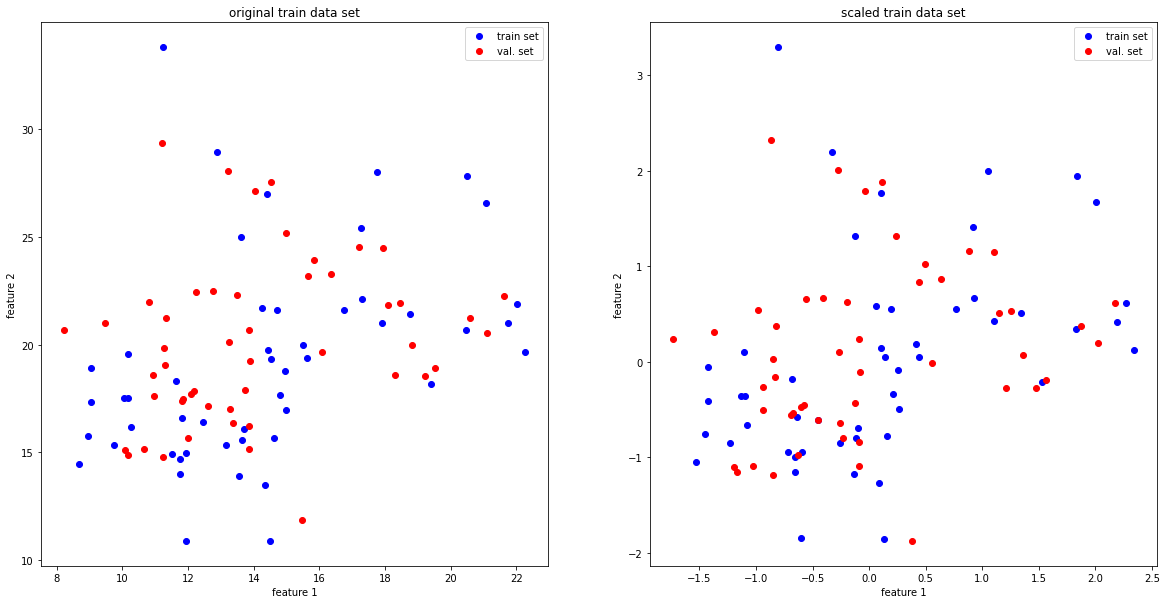

In [144]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('original train data set')
plt.legend(['train set', 'val. set'])

plt.subplot(1,2,2)
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.title('scaled train data set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])

plt.show()

왼쪽 (원본)산점도와 오른쪽 (표준화 스케일된 데이터) 산점도를 자세히 비교해보면 원본 훈련세트와 검증 세트의 점 사이의거리가 변환된 후에 그대로 유지 되지 않았다는 점을 알수 있다. __데이터를 제대로 스케일 조정을 했다면 훈련세트와 검증세트의 거리가 그대로 유지되어야 하지만 데이터의 거리가 달라진 이유는 훈련 세트와 검증세트를 각각 다른 비율로 전처리 했기 때문__이다. 

#### 3. 올바른 검증 세트 전처리하기

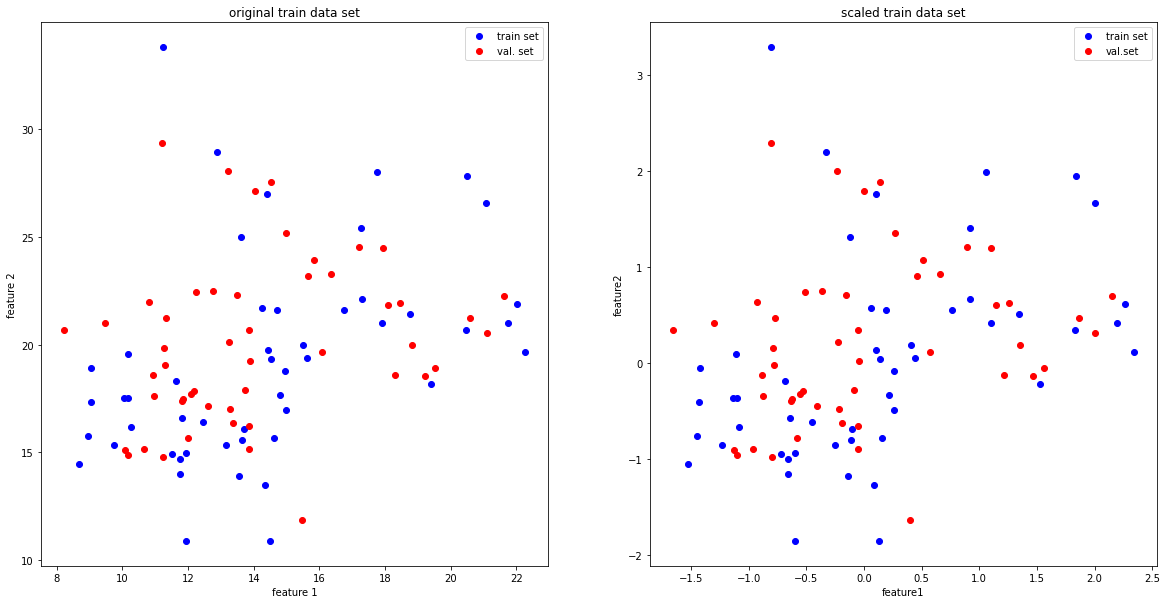

In [148]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('original train data set')
plt.legend(['train set', 'val. set'])

x_val_scaled=(x_val-train_mean)/train_std
plt.subplot(1,2,2)
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('scaled train data set')

plt.legend(['train set', 'val.set'])

plt.show()

__스케일 조정을 한 이후에 원본과 표준화 된 데이터의 산점도 분포가 같아졌다__

#### 4. 모델평가하기

In [149]:
layer2.score(x_val_scaled, y_val)

0.967032967032967

검증세트와 전처리의 필요성에 대해 알아보았다. 실전에 투입될 새로운 데이터에도 같은 전처리를 적용해야 한다는 것을 알았다. 

🎹 key point!!!
- 모델을 튜닝하려면 테스트 세트 대신에 검증세트를 사용한다.
- 데이터를 전처리 할때 훈련세트의 통계값으로 검증세트와 테스트세트를 변환해야 한다.

### 부록

numpy의 차원 늘리기
- 1차원 array

In [152]:
a=np.array([i for i in range(10)])
b=np.array([i for i in range(10,20)])

In [153]:
c=np.append(a,b) # axis를 입력 안하면 1차원 연장
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [154]:
c=np.append(a,b,axis=-1)
c # axis가 -1이어도 연장되는 방향으로 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

- 1차원 -> 2차원 matrix  
: 여러가지 방법이 있었는데, 제가 익힌 방법은 reshape로 각 array의 차원을 확장하고 append로 두개의 확장된 array를 추가.

In [156]:
a=np.array([i for i in range(10)])
b=np.array([i for i in range(10,20)])
a=a.reshape(1,a.shape[0])
b=b.reshape(1,b.shape[0])
c=np.append(a,b,axis=0) 
c

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [157]:
print("axis=1은 각 행의 평균을 낸다",np.mean(c, axis=1)) 
print("axis=0은 각 열의 평균을 낸다."np.mean(c, axis=0))

[ 4.5 14.5]
[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


1차원 array 인덱스[행]
2차원 array 인덱스[열,행]
3차원 array 인덱스[채널,열,행] 으로 접근이 가능하고 axis도 이 인덱스 번호에 맞춰서 기준을 잡는다고 생각하면 되겠다.

In [136]:
a=[i for i in range(10)]
a_=np.array([i for i in range(10,19)]).reshape((1,3,3))
b=np.array(a)
c=b[0:9].reshape((1,3,3))
print(a_.shape, c.shape)
d= np.append(c, a_, axis=0)

(1, 3, 3) (1, 3, 3)


In [137]:
d

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [112]:
print(d[0,:,:])
print(d[1,:,:])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[10 11 12]
 [13 14 15]
 [16 17 18]]
